In [1]:
from sklearn import neighbors
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from scipy.spatial import distance
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target, test_size=0.4, random_state=0)

k_neighbors = 7
classifier = neighbors.KNeighborsClassifier(k_neighbors, weights="distance")
classifier = classifier.fit(X_train, y_train)

In [3]:
cross_val_score(classifier, iris_dataset.data, iris_dataset.target, cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [4]:
features = iris_dataset.data[:,:2]
labels = iris_dataset.target

setosa_features = features[labels == 0,:]
versicolor_features = features[labels == 1,:]
virginica_features = features[labels == 2,:]

In [5]:
def plot_data(setosa_features, versicolor_features, virginica_features, title="Iris dataset", wrong_predictions=None):
    all_iris_features = (setosa_features, versicolor_features, virginica_features)
    labels_colors = ("#FF0000", "#00FF00", "#0000FF")
    labels_names = ("Setosa", "Versicolor", "Virginica")

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel("Sepal length (cm)")
    ax.set_ylabel("Sepal width (cm)")
    
    for iris_features, label_color, label_name in zip(all_iris_features, labels_colors, labels_names):
        ax.scatter(iris_features[:,0], iris_features[:,1], c=label_color, label=label_name)

    if wrong_predictions is not None:
        ax.scatter(wrong_predictions[:,0], wrong_predictions[:,1], s=100, c="black", label="Wrong", marker="x")

    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

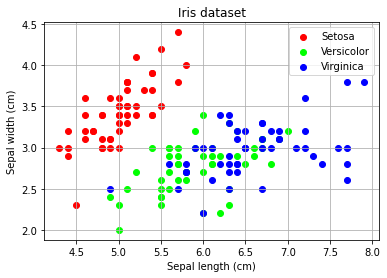

In [6]:
plot_data(setosa_features, versicolor_features, virginica_features)

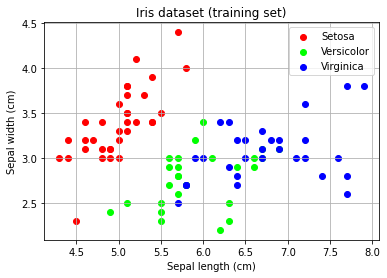

In [7]:
plot_data(X_train[:,:2][y_train == 0,:], X_train[:,:2][y_train == 1,:], X_train[:,:2][y_train == 2,:], title="Iris dataset (training set)")

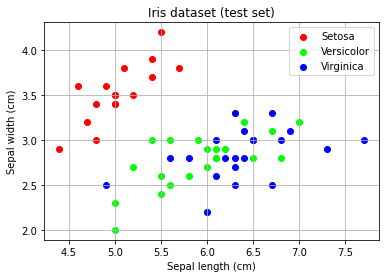

In [8]:
plot_data(X_test[:,:2][y_test == 0,:], X_test[:,:2][y_test == 1,:], X_test[:,:2][y_test == 2,:], title="Iris dataset (test set)")

In [9]:
def get_wrong_predictions(correct_values, predicted_values):
    wrong_predictions = []

    for i, elem in enumerate(correct_values):
        if elem != predicted_values[i]:
            wrong_predictions.append(i)
    
    return np.array(wrong_predictions)

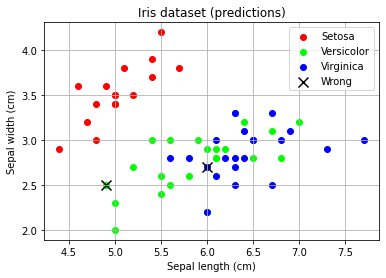

Accuracy: 0.9666666666666667


In [10]:
predictions = classifier.predict(X_test)

# wrong_predictions = X_test[get_wrong_predictions(y_test, predictions)]
wrong_predictions = X_test[y_test != predictions]

plot_data(X_test[:,:2][predictions == 0], X_test[:,:2][predictions == 1], X_test[:,:2][predictions == 2], title="Iris dataset (predictions)", wrong_predictions=wrong_predictions[:,:2])
print(f"Accuracy: {accuracy_score(y_test, predictions)}")

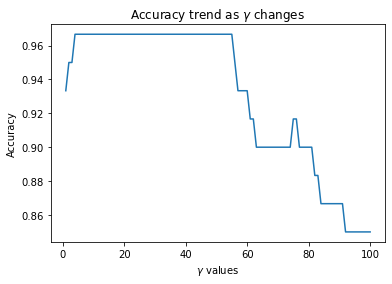

Best γ: 4
Best accuracy: 0.9666666666666667


In [11]:
best_gamma = 0.
best_accuracy = 0.
max_iter = 100
accuracies = np.empty(max_iter)
rbf_k = lambda x, y: 1 - np.exp(-gamma * distance.sqeuclidean(x, y))

for gamma in range(1, max_iter + 1):
    tmp_clf = neighbors.KNeighborsClassifier(k_neighbors, metric=rbf_k, weights="distance")
    tmp_clf = tmp_clf.fit(X_train, y_train)
    accuracy = tmp_clf.score(X_test, y_test)
    accuracies[gamma - 1] = accuracy

    if accuracy > best_accuracy:
        best_gamma = gamma
        best_accuracy = accuracy

plt.xlabel(r"$\gamma$ values")
plt.ylabel("Accuracy")
plt.title(r"Accuracy trend as $\gamma$ changes")
plt.plot(np.arange(1, max_iter + 1), accuracies)
plt.show()

print(f"Best \u03B3: {best_gamma}")
print(f"Best accuracy: {best_accuracy}")